## Import Dependencies

1. Pandas for data analysis
2. Matplotlib for visuals
3. Scipy for statistical analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## Import and Clean Data

### Gini Coefficient Data

In [2]:
income_data = pd.read_csv("raw_data/income_Distribution_OECD_013021.csv")
income_data.head()

C:\Users\berry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.326,NaN,NaN
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.337,NaN,NaN
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.330,NaN,NaN
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.325,NaN,NaN
4,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2004,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.315,NaN,NaN


### Union Density Data

In [3]:
union_df = pd.read_csv("raw_data/uniondata.csv")
union_df.head()

,Unnamed: 0,Country,Source,Series,Year,Unit,Value
0,54,Hungary,Survey data,Trade union density,2004,Percentage,16.8
1,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9
2,56,Hungary,Survey data,Trade union density,2015,Percentage,9.0
3,94,Poland,Administrative data,Trade union density,1999,Percentage,29.1
4,95,Poland,Administrative data,Trade union density,2000,Percentage,24.7


### Gini Coefficient Data

In [4]:
gini_cpi_df = pd.read_csv("raw_data/gini_cpi.csv")
gini_cpi_df.head()

,Unnamed: 0,Country,MEASURE,Age group,Year,Unit Code,Unit,Value
0,0,Australia,GINI,Total population,2012,0_TO_1,0-1 scale,0.326
1,1,Australia,GINI,Total population,2014,0_TO_1,0-1 scale,0.337
2,2,Australia,GINI,Total population,2016,0_TO_1,0-1 scale,0.330
3,3,Australia,GINI,Total population,2018,0_TO_1,0-1 scale,0.325
4,6,Australia,GINI,Total population,2010,0_TO_1,0-1 scale,0.334


### Merge dataframes
- Filter for 2009 to 2018
    - union_df includes 21 years, from 1998 to 2018
    - gini_cpi_df includes 11 years, from 2009 to 2019

In [5]:
df = pd.merge(union_df, gini_cpi_df, on=["Country", "Year"], suffixes=("_union", "_gini_cpi"))
df.head()

,Unnamed: 0_union,Country,Source,Series,Year,Unit_union,Value_union,Unnamed: 0_gini_cpi,MEASURE,Age group,Unit Code,Unit_gini_cpi,Value_gini_cpi
0,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7947,GINI,Total population,0_TO_1,0-1 scale,0.241000
1,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7959,GINI,Total population,0_TO_1,0-1 scale,0.272000
2,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7964,CPI2010,Total population,IDX,Index,95.369304
3,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7976,CPI2010,Total population,IDX,Index,95.369304
4,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,29555,GINI,Working age population: 18-65,0_TO_1,0-1 scale,0.245000


### Remove unrelated columns

In [6]:
df_09_18 = df[["Country", "Year", "Value_union", "MEASURE", "Age group", "Value_gini_cpi"]]
df_09_18.head()

,Country,Year,Value_union,MEASURE,Age group,Value_gini_cpi
0,Hungary,2009,11.9,GINI,Total population,0.241000
1,Hungary,2009,11.9,GINI,Total population,0.272000
2,Hungary,2009,11.9,CPI2010,Total population,95.369304
3,Hungary,2009,11.9,CPI2010,Total population,95.369304
4,Hungary,2009,11.9,GINI,Working age population: 18-65,0.245000


### Filter for Working Age Population: 18~65

In [7]:
working_age = df_09_18[df_09_18["Age group"] == "Working age population: 18-65"]

gini_working = working_age[working_age["MEASURE"] == "GINI"]
gini_working = gini_working.drop_duplicates(subset=["Country","Year"])

cpi_working = working_age[working_age["MEASURE"] != "GINI"]
cpi_working = cpi_working.drop_duplicates(subset=["Country","Year"])

# Merge two dfs: gigi_working, cpi_working
# Drop unrelated columns
data_working = pd.merge(gini_working, cpi_working, on=["Country", "Year"])\
                        .drop(columns=["MEASURE_x", "Age group_x", "Value_union_y", "MEASURE_y", "Age group_y"])
# Rename columns 
data_working = data_working.rename(columns = {
                                                "Value_union_x": "Union %",
                                                "Value_gini_cpi_x": "Gini",
                                                "Value_gini_cpi_y": "CPI"
                                            })
data_working

data_working.to_csv("output/data_working.csv")

In [8]:
data_working

,Country,Year,Union %,Gini,CPI
0,Hungary,2009,11.9,0.245,95.369304
1,Hungary,2015,9.0,0.291,111.384411
2,Poland,2009,16.3,0.305,97.484226
3,Poland,2010,18.3,0.307,100.000000
4,Poland,2011,17.0,0.304,104.239401
...,...,...,...,...,...
269,United States,2013,10.8,0.392,106.833852
270,United States,2014,10.7,0.389,108.566940
271,United States,2015,10.6,0.384,108.695723
272,United States,2016,10.3,0.385,110.067028


## Group countries by Regions
- Western (Western Europe, Israel, Australia, New Zealand, Canada)
- Eastern Europe
- Scandinavia
- US
- East Asia
- Latin America

In [9]:
west = ['United Kingdom', 'Spain', 'Austria', 'France', 'Germany', 'Ireland', 'Switzerland', 'Italy', 'Luxembourg', 
        'Greece', 'Israel', 'Netherlands', 'Belgium', 'Australia', 'New Zealand', 'Portugal', 'Turkey', 'Canada']
east =  ['Estonia', 'Czech Republic', 'Latvia', 'Lithuania', 'Hungary', 'Slovak Republic', 'Slovenia', 'Poland'] 
scandinavian = ['Norway', 'Finland' ,'Iceland', 'Sweden', 'Denmark']
us = ['United States']
asia = ['Korea', 'Japan']
latin = ['Mexico', 'Chile']

In [10]:
regions = {
    "West": west,
    "East": east,
    "Scandinavia": scandinavian,
    "US": us,
    "Asia": asia,
    "Latin": latin
}
working = data_working
working["Region"] = ""
for index, row in working.iterrows():
    for region in regions:
        if row.Country in regions[region]: 
            working.loc[index, "Region"] = region
            break
            
working.head()

,Country,Year,Union %,Gini,CPI,Region
0,Hungary,2009,11.9,0.245,95.369304,East
1,Hungary,2015,9.0,0.291,111.384411,East
2,Poland,2009,16.3,0.305,97.484226,East
3,Poland,2010,18.3,0.307,100.000000,East
4,Poland,2011,17.0,0.304,104.239401,East


In [11]:
def plot_groupby(df, x, y, by, kind):
    is_setting_xlim, is_setting_ylim = True, True
    try:
        x_max = df[x].max()*1.05
        x_min = df[x].min()*0.95
    except:
        is_setting_xlim = False
        
    try:
        y_max = df[y].max()*1.05
        y_min = df[y].min()*0.95
    except:
        is_setting_ylim = False
        
    fig, ax = plt.subplots(3, 2, figsize=(20, 35))
    i = 0
    for member in df[by].value_counts().index:
        data_by = df[df[by] == member]
        current_ax = ax[i // 2][i % 2]
        
        if kind == "scatter":
            data_by.plot.scatter(x=x, y=y, ax=current_ax, grid=True)
        if kind == "hist":
            data_by.plot.hist(ax=current_ax)
        if kind == "bar":
            data_by.plot.bar(x=x, y=y,ax=current_ax)
            
        current_ax.set_title(f"{member}")
        if is_setting_xlim: current_ax.set_xlim(x_min, x_max)
        if is_setting_ylim: current_ax.set_ylim(y_min, y_max)

        i += 1
    

In [12]:
# plot_groupby(working, x="Year", y="Gini", by="Region", kind="bar")

In [13]:
west_df = pd.DataFrame({"Country": west})
east_df = pd.DataFrame({"Country": east})
scand_df = pd.DataFrame({"Country": scandinavian})
us_df = pd.DataFrame({"Country": us})
asia_df = pd.DataFrame({"Country": asia})
latin_df = pd.DataFrame({"Country": latin})

In [14]:
west_filter = pd.merge(data_working, west_df, on=["Country"])
east_filter = pd.merge(data_working, east_df, on=["Country"])
scand_filter = pd.merge(data_working, scand_df, on=["Country"])
us_filter = pd.merge(data_working, us_df, on=["Country"])
asia_filter = pd.merge(data_working, asia_df, on=["Country"])
latin_filter = pd.merge(data_working, latin_df, on=["Country"])

#assign colors to regions

df = {
    "west": {"df": west_filter, "x":0, "y":0, "color": "c"},
    "east": {"df": east_filter, "x":0, "y":1, "color": "m"},
    "scand": {"df":scand_filter, "x":1, "y":0, "color": "y"},
    "us": {"df":us_filter, "x":1, "y":1, "color": "b"},
    "asia": {"df":asia_filter, "x":2, "y":0, "color": "g"},
    "latin": {"df":latin_filter, "x":2, "y":1, "color": "r"}
}

## Plot Union Density and Gini Coefficient by Region

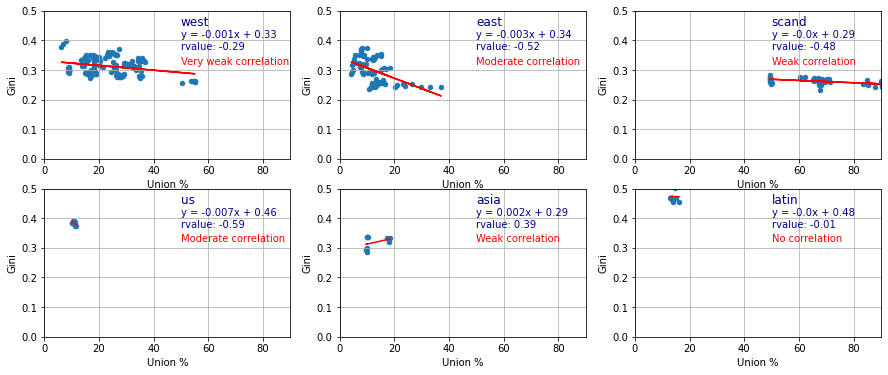

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

i = 0
for region in df:
#     x_position=df[region]["x"]
#     y_position=df[region]["y"]
    current_ax = ax[i // 3][i % 3]
    df[region]["df"].plot.scatter(x="Union %", y="Gini", ax=current_ax, grid=True)
#     ax[x_position][y_position].set_title(region)
    current_ax.set_ylim(0, 0.5)
    current_ax.set_xlim(0, 90)
    
    x = df[region]["df"]["Union %"]
    y = df[region]["df"]["Gini"]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 3)}x + {round(intercept, 2)}"
    current_ax.plot(x, regress_values, "r-")
    
    current_ax.annotate(region, (50,0.45), fontsize=12, color="darkblue")
    current_ax.annotate(line_eq, (50,0.41), fontsize=10, color="darkblue")
    current_ax.annotate(f"rvalue: {round(rvalue,2)}", (50,0.37), fontsize=10, color="darkblue")
    
    correlation = "No correlation"
    if abs(rvalue) < 0.1:
        correlation = "No correlation"
    elif abs(rvalue) < 0.3:
        correlation = "Very weak correlation"
    elif abs(rvalue) < 0.5:
        correlation = "Weak correlation"
    elif abs(rvalue) < 0.7:
        correlation = "Moderate correlation"
    elif abs(rvalue) < 1:
        correlation = "Strong correlation"
    current_ax.annotate(correlation, (50,0.32), fontsize=10, color="red")    
    
    i += 1
    
    plt.savefig("output/regional_regression_udvgc.png")
    
    

## Assign colors to regions

In [16]:
data_working
data_working["Color"] = ""
data_working["Group"] = ""
data_working.head()

,Country,Year,Union %,Gini,CPI,Region,Color,Group
0,Hungary,2009,11.9,0.245,95.369304,East,,
1,Hungary,2015,9.0,0.291,111.384411,East,,
2,Poland,2009,16.3,0.305,97.484226,East,,
3,Poland,2010,18.3,0.307,100.000000,East,,
4,Poland,2011,17.0,0.304,104.239401,East,,


In [17]:

for index, row in data_working.iterrows():
    if row["Country"] in west: 
        data_working.loc[index,"Group"] = 10
        data_working.loc[index,"Color"] = "c"
    if row["Country"] in east: 
        data_working.loc[index,"Group"] = 50 
        data_working.loc[index,"Color"] = "m"
    if row["Country"] in scandinavian: 
        data_working.loc[index,"Group"] = 95
        data_working.loc[index,"Color"] = "y"
    if row["Country"] in us: 
        data_working.loc[index,"Group"] = 130 
        data_working.loc[index,"Color"] = "b"
    if row["Country"] in asia: 
        data_working.loc[index,"Group"] = 160
        data_working.loc[index,"Color"] = "g"
    if row["Country"] in latin: 
        data_working.loc[index,"Group"] = 190
        data_working.loc[index,"Color"] = "r"
data_working.head()
# data_working.plot.scatter(x="Union %", y="Gini", c="Group", colormap="viridis")

,Country,Year,Union %,Gini,CPI,Region,Color,Group
0,Hungary,2009,11.9,0.245,95.369304,East,m,50
1,Hungary,2015,9.0,0.291,111.384411,East,m,50
2,Poland,2009,16.3,0.305,97.484226,East,m,50
3,Poland,2010,18.3,0.307,100.000000,East,m,50
4,Poland,2011,17.0,0.304,104.239401,East,m,50


In [18]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

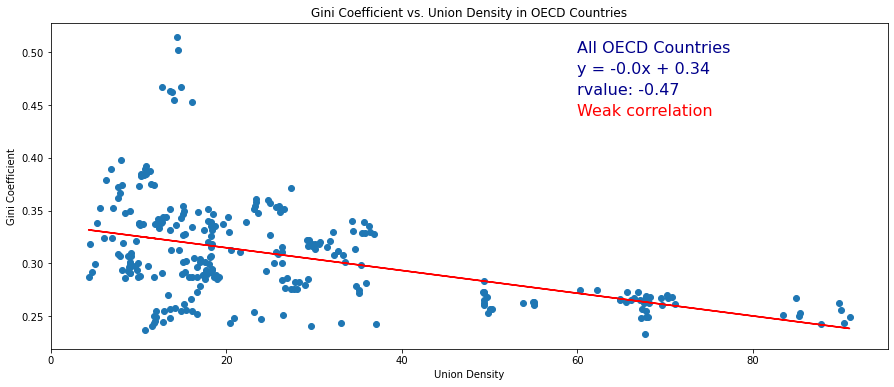

In [19]:
plt.figure(figsize=(15, 6))

x = data_working["Union %"]
y = data_working["Gini"]
plt.scatter(x, y,)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x, regress_values, "r-")
plt.xlabel("Union Density")
plt.ylabel("Gini Coefficient")
plt.title("Gini Coefficient vs. Union Density in OECD Countries")

plt.annotate("All OECD Countries", (60,0.5), fontsize=16, color="darkblue")
plt.annotate(line_eq, (60,0.48), fontsize=16, color="darkblue")
plt.annotate(f"rvalue: {round(rvalue,2)}", (60,0.46), fontsize=16, color="darkblue")

correlation = "No correlation"
if abs(rvalue) > 0.25:
    correlation = "Very weak correlation"
if abs(rvalue) > 0.3:
    correlation = "Weak correlation"
elif abs(rvalue) > 0.5:
    correlation = "Moderate correlation"
elif abs(rvalue) > 0.7:
    correlation = "Strong correlation"
plt.annotate(correlation, (60,0.44), fontsize=16, color="red")    


plt.savefig("output/oecd_regression_udvgc.png")



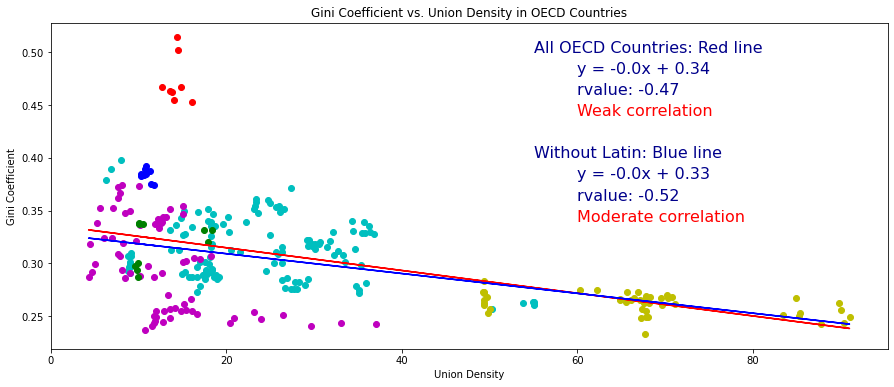

In [20]:
plt.figure(figsize=(15, 6))
i = 0
for region in df:
    x = df[region]["df"]["Union %"]
    y = df[region]["df"]["Gini"]
    plt.scatter(x, y, c=df[region]["color"] )
    #plt.annotate(f"{region}: {df[region]['color']}", (80, 0.5 - i*0.02), fontsize=16, color="darkblue"  )
    i += 1

x = data_working["Union %"]
y = data_working["Gini"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x, regress_values, "r-")
plt.xlabel("Union Density")
plt.ylabel("Gini Coefficient")
plt.title("Gini Coefficient vs. Union Density in OECD Countries")

plt.annotate("All OECD Countries: Red line", (55,0.5), fontsize=16, color="darkblue")
plt.annotate(line_eq, (60,0.48), fontsize=16, color="darkblue")
plt.annotate(f"rvalue: {round(rvalue,2)}", (60,0.46), fontsize=16, color="darkblue")

correlation = "No correlation"
if abs(rvalue) > 0.25:
    correlation = "Very weak correlation"
if abs(rvalue) > 0.3:
    correlation = "Weak correlation"
elif abs(rvalue) > 0.5:
    correlation = "Moderate correlation"
elif abs(rvalue) > 0.7:
    correlation = "Strong correlation"
plt.annotate(correlation, (60,0.44), fontsize=16, color="red")    


data_working1 = data_working[data_working["Region"] != "Latin"]
x1 = data_working1["Union %"]
y1 = data_working1["Gini"]
(slope1, intercept1, rvalue1, pvalue1, stderr1) = st.linregress(x1, y1)
regress_values1 = x1 * slope1 + intercept1
line_eq1 = f"y = {round(slope1, 2)}x + {round(intercept1, 2)}"
plt.plot(x1, regress_values1, "b-")

plt.annotate("Without Latin: Blue line", (55,0.40), fontsize=16, color="darkblue")
plt.annotate(line_eq1, (60,0.38), fontsize=16, color="darkblue")
plt.annotate(f"rvalue: {round(rvalue1,2)}", (60,0.36), fontsize=16, color="darkblue")

correlation = "No correlation"
if abs(rvalue1) < 0.3:
    correlation = "Very weak correlation"
elif abs(rvalue1) < 0.5:
    correlation = "Weak correlation"
elif abs(rvalue1) < 0.7:
    correlation = "Moderate correlation"
elif abs(rvalue1) < 1:
    correlation = "Strong correlation"
plt.annotate(correlation, (60,0.34), fontsize=16, color="red")
plt.savefig("output/oecd_regression_wo_latin.png")

In [69]:
def linear_regression(df, x_column, y_column, **kwargs):
    """
    df: dataframe
    x: string, column name
    y: string, column name
    """
    import matplotlib.pyplot as plt
    plt.figure(figsize=kwargs["figsize"]) if "figsize" in kwargs else plt.figure()
#     if not figsize:
#         plt.figure(figsize=figsize)
#     else:
#         plt.figure()
    x = df[x_column]
    y = df[y_column]
    plt.scatter(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.plot(x, regress_values, "r-")
    
    x_position = df[x_column].max()*0.75
    y_position = df[y_column].max()*0.9
    plt.annotate(line_eq, (x_position, y_position), fontsize=16, color="darkblue")
    plt.annotate(f"rvalue: {round(rvalue,2)}", (x_position, y_position*0.9), fontsize=16, color="darkblue")


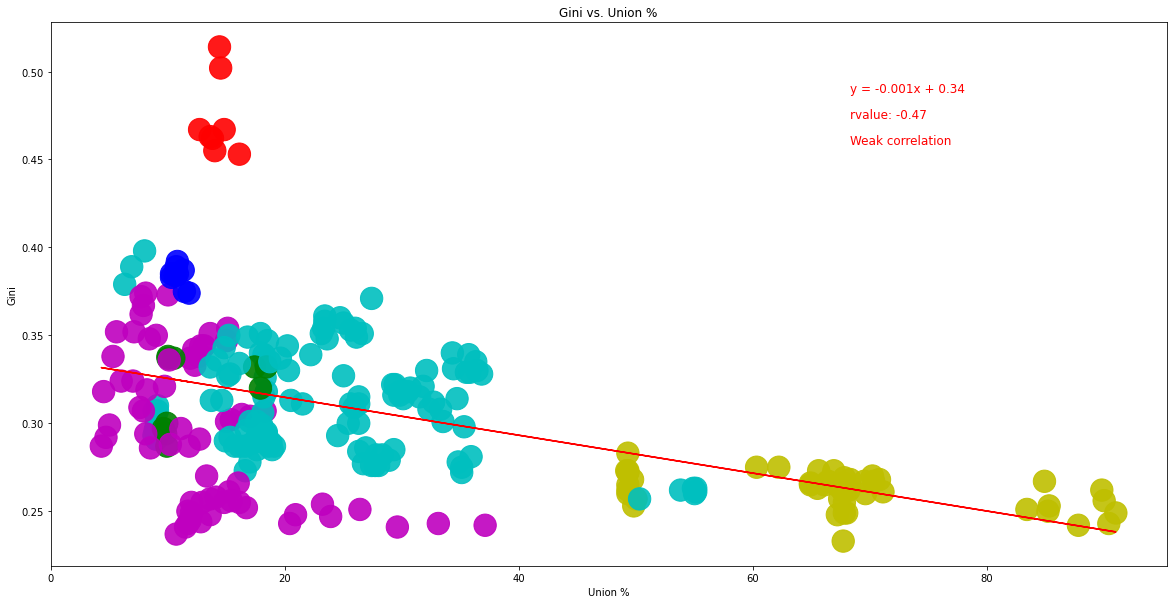

In [70]:
def linear_regression1(df, x_col, y_col, **kwargs):
    """
    df: dataframe
    x: string, column name
    y: string, column name
    """
    import matplotlib.pyplot as plt
    import scipy.stats as st

    plt.figure(figsize=kwargs["figsize"]) if "figsize" in kwargs else plt.figure()

    x = df[x_col]
    y = df[y_col]
    color = df["Color"]
    plt.scatter(x, y, s=500, c=color, alpha=0.9)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 3)}x + {round(intercept, 2)}"
    plt.plot(x, regress_values, "r-")

    xy = kwargs["xy"] if "xy" in kwargs else (x.max() * 0.75, y.max() * 0.95)
    fontsize = kwargs["fontsize"] if "fontsize" in kwargs else 12
    color = kwargs["color"] if "color" in kwargs else "red"
    plt.annotate(line_eq, xy, fontsize=fontsize, color=color)
    px, py = xy
    plt.annotate(f"rvalue: {round(rvalue, 2)}", (px, py * 0.97), fontsize=fontsize, color=color)
    correlation = "No correlation"
    if abs(rvalue) > 0.3:
        correlation = "Weak correlation"
    elif abs(ravlue) > 0.5:
        correlation = "Moderate correlation"
    elif abs(ravlue) > 0.7:
        correlation = "Strong correlation"
    plt.annotate(correlation, (px, py * 0.94), fontsize=fontsize, color=color)    
       
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs. {x_col}")

    
linear_regression1(data_working, x_col="Union %", y_col="Gini", figsize=(20,10))
plt.savefig("output/oecd_regression_w_latin.png")

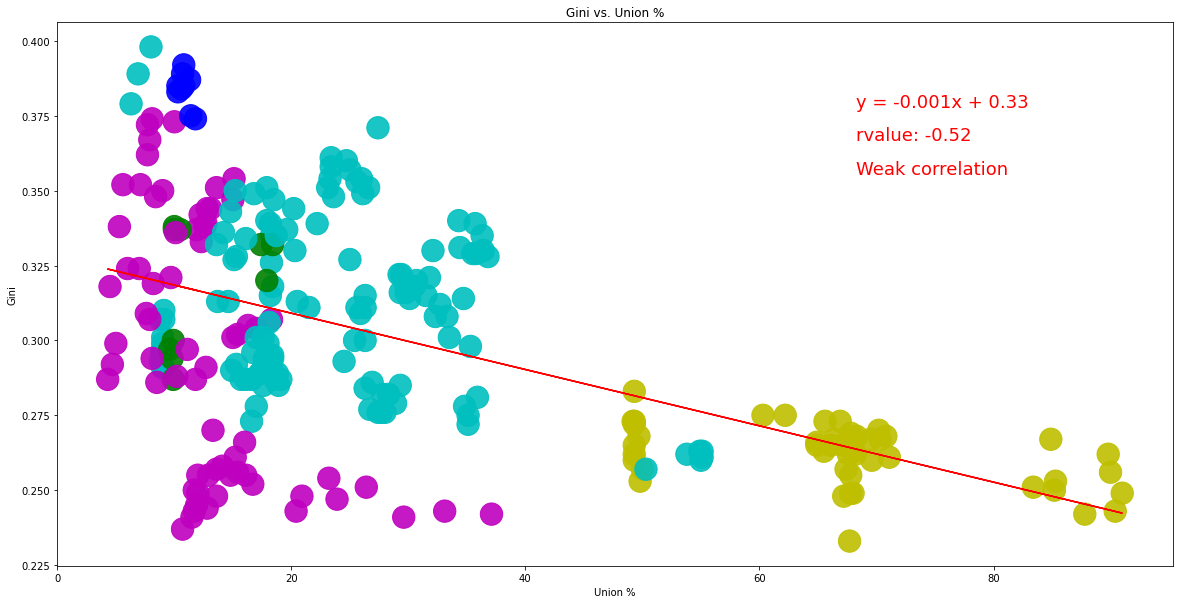

In [23]:
df1 = data_working[data_working["Region"] != "Latin"]
linear_regression1(df1, x_col="Union %", y_col="Gini", figsize=(20,10), fontsize=18)
plt.savefig("output/oecd_regression_wo_latin.png")

# Time to look at Union Density and GDP

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [25]:
# Import .csv and conver to a df
file_GDP = 'raw_data/GDP_OECD_v2.csv'
GDP_df = pd.read_csv(file_GDP, index_col=1)

In [26]:
#replace country abbreviations with names
GDP_dfv2=GDP_df.replace({'LOCATION': {'AUS':'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 
                             'CAN': 'Canada', 'CZE': 'Czech Republic', 'DNK': 'Denmark',
                             'FIN': 'Finland', 'FRA': 'France',  'DEU': 'Germany',                           
                             'GRC': 'Greece', 'HUN': 'Hungary',  'ISL': 'Iceland',
                             'IRL': 'Ireland', 'ITA': 'Italy', 'JPN': 'Japan',
                             'KOR': 'Korea','LUX': 'Luxembourg', 'MEX': 'Mexico', 
                             'NLD': 'Netherlands',  'NZL': 'New Zealand', 'NOR': 'Norway',
                             'POL': 'Poland','PRT': 'Portugal','SVK': 'Slovak Republic',
                             'SVN': 'Slovenia','ESP': 'Spain','SWE': 'Sweden', 'GBR': 'United Kingdom',
                             'TUR': 'Turkey',  'USA': 'United States','CHE': 'Sitzerland',
                             'CHL': 'Chile', 'EST': 'Estonia','ISR': 'Israel',
                             'LVA': 'Latvia', 'LTU': 'Lithuania'}
                            })
#GDP_df.head()
GDP_dfv2.head()

,LOCATION,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
INDICATOR,,,,,,,
GDP,Australia,TOT,USD_CAP,A,2009,41614.09072,NaN
GDP,Australia,TOT,USD_CAP,A,2010,42787.06596,NaN
GDP,Australia,TOT,USD_CAP,A,2011,44419.30975,NaN
GDP,Australia,TOT,USD_CAP,A,2012,43879.18036,NaN
GDP,Australia,TOT,USD_CAP,A,2013,47761.21406,NaN


In [27]:
#rename columns
GDP_dfv2.rename(columns={'LOCATION': 'Country', 'TIME': 'Year'}, inplace=True)
GDP_dfv2.head()

,Country,SUBJECT,MEASURE,FREQUENCY,Year,Value,Flag Codes
INDICATOR,,,,,,,
GDP,Australia,TOT,USD_CAP,A,2009,41614.09072,NaN
GDP,Australia,TOT,USD_CAP,A,2010,42787.06596,NaN
GDP,Australia,TOT,USD_CAP,A,2011,44419.30975,NaN
GDP,Australia,TOT,USD_CAP,A,2012,43879.18036,NaN
GDP,Australia,TOT,USD_CAP,A,2013,47761.21406,NaN


In [28]:
# Import union density data
file_Union = 'raw_data/uniondata.csv'
union_df = pd.read_csv(file_Union, index_col=0)
union_df.head()

,Country,Source,Series,Year,Unit,Value
54,Hungary,Survey data,Trade union density,2004,Percentage,16.8
55,Hungary,Survey data,Trade union density,2009,Percentage,11.9
56,Hungary,Survey data,Trade union density,2015,Percentage,9.0
94,Poland,Administrative data,Trade union density,1999,Percentage,29.1
95,Poland,Administrative data,Trade union density,2000,Percentage,24.7


In [29]:
GDP_data_complete = union_df.merge(GDP_dfv2, on=["Country", "Year"])
GDP_data_complete

,Country,Source,Series,Year,Unit,Value_x,SUBJECT,MEASURE,FREQUENCY,Value_y,Flag Codes
0,Hungary,Survey data,Trade union density,2009,Percentage,11.9,TOT,USD_CAP,A,20689.04670,NaN
1,Hungary,Survey data,Trade union density,2015,Percentage,9.0,TOT,USD_CAP,A,26777.47046,NaN
2,Hungary,Administrative data,Trade union density,2015,Percentage,9.4,TOT,USD_CAP,A,26777.47046,NaN
3,Poland,Administrative data,Trade union density,2009,Percentage,16.3,TOT,USD_CAP,A,19088.28902,NaN
4,Poland,Administrative data,Trade union density,2010,Percentage,18.3,TOT,USD_CAP,A,20828.98653,NaN
...,...,...,...,...,...,...,...,...,...,...,...
396,United States,Survey data,Trade union density,2014,Percentage,10.7,TOT,USD_CAP,A,55008.01240,NaN
397,United States,Survey data,Trade union density,2015,Percentage,10.6,TOT,USD_CAP,A,56831.65482,NaN
398,United States,Survey data,Trade union density,2016,Percentage,10.3,TOT,USD_CAP,A,58000.88803,NaN
399,United States,Survey data,Trade union density,2017,Percentage,10.3,TOT,USD_CAP,A,60091.56878,NaN


In [30]:
GDP_data_complete.to_csv('output/consolidated_gdp_ud.csv')

In [31]:
GDP_working_df=GDP_data_complete[['Country', 'Year', 'Value_x', 'Value_y']]
GDP_working_df.head()

,Country,Year,Value_x,Value_y
0,Hungary,2009,11.9,20689.04670
1,Hungary,2015,9.0,26777.47046
2,Hungary,2015,9.4,26777.47046
3,Poland,2009,16.3,19088.28902
4,Poland,2010,18.3,20828.98653


In [32]:
GDP_working_df.rename(columns={'Value_x': 'Union Density', 'Value_y': 'GDP'}, inplace=True)
GDP_working_df.head()

C:\Users\berry\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country,Year,Union Density,GDP
0,Hungary,2009,11.9,20689.04670
1,Hungary,2015,9.0,26777.47046
2,Hungary,2015,9.4,26777.47046
3,Poland,2009,16.3,19088.28902
4,Poland,2010,18.3,20828.98653


## Plot Data

<AxesSubplot:xlabel='Union Density', ylabel='GDP'>

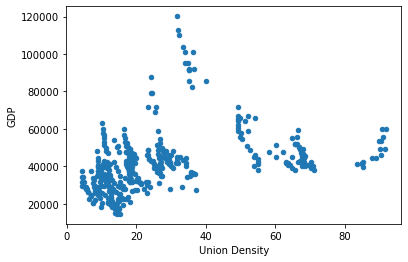

In [33]:
GDP_working_df.plot.scatter(x='Union Density', y='GDP')

In [34]:
west = ['United Kingdom', 'Spain', 'Austria', 
            'France', 'Germany', 'Ireland', 
            'Switzerland', 'Italy', 'Luxembourg', 
            'Greece', 'Israel','Netherlands', 
            'Belgium', 'Australia', 'New Zealand', 
            'Portugal', 'Turkey', 'Canada']


east =  ['Estonia', 'Czech Republic', 'Latvia', 
             'Lithuania', 'Hungary', 'Slovak Republic', 
             'Slovenia', 'Poland'] 

scandinavian = ['Norway', 'Finland' ,'Iceland', 'Sweden', 'Denmark']

us = ['United States']

asia = ['Korea', 'Japan']

latin = ['Mexico', 'Chile']

In [35]:
west_df = pd.DataFrame({"Country": west})
east_df = pd.DataFrame({"Country": east})
scand_df = pd.DataFrame({"Country": scandinavian})
us_df = pd.DataFrame({"Country": us})
asia_df = pd.DataFrame({"Country": asia})
latin_df = pd.DataFrame({"Country": latin})

In [36]:
west_filter = pd.merge(GDP_working_df, west_df, on=["Country"])
east_filter = pd.merge(GDP_working_df, east_df, on=["Country"])
scand_filter = pd.merge(GDP_working_df, scand_df, on=["Country"])
us_filter = pd.merge(GDP_working_df, us_df, on=["Country"])
asia_filter = pd.merge(GDP_working_df, asia_df, on=["Country"])
latin_filter = pd.merge(GDP_working_df, latin_df, on=["Country"])

df = {
    "Western": {"df": west_filter, "x":0, "y":0, "color": "red"},
    "Eastern Europe": {"df": east_filter, "x":0, "y":1, "color": "blue"},
    "Scandanavia": {"df":scand_filter, "x":1, "y":0, "color": "green"},
    "US": {"df":us_filter, "x":1, "y":1, "color": "yellow"},
    "East Asia": {"df":asia_filter, "x":2, "y":0, "color": "pink"},
    "Latin American": {"df":latin_filter, "x":2, "y":1, "color": "purple"}
}

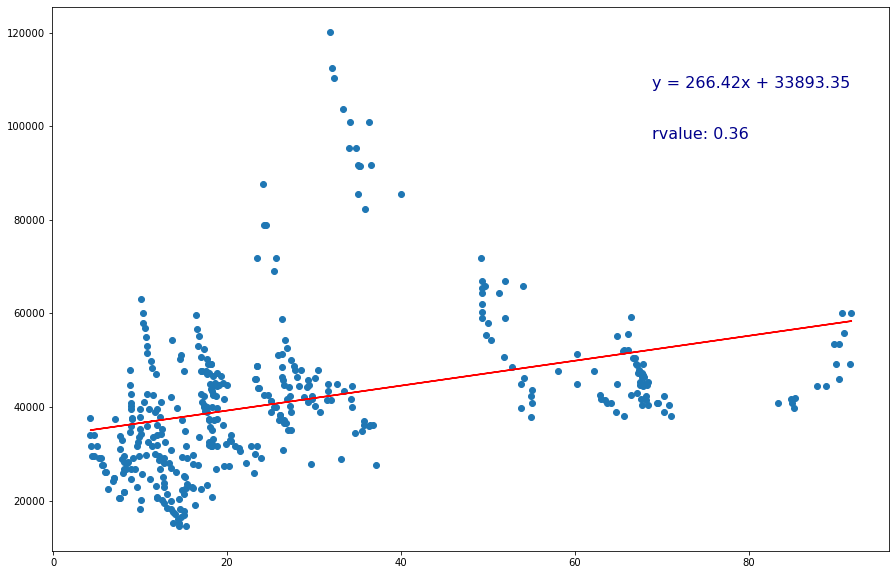

In [85]:
linear_regression(GDP_working_df,x_column="Union Density",y_column="GDP",figsize=(15,10))
plt.savefig("output/oecd_regression_gdp.png")

# Regional Plots

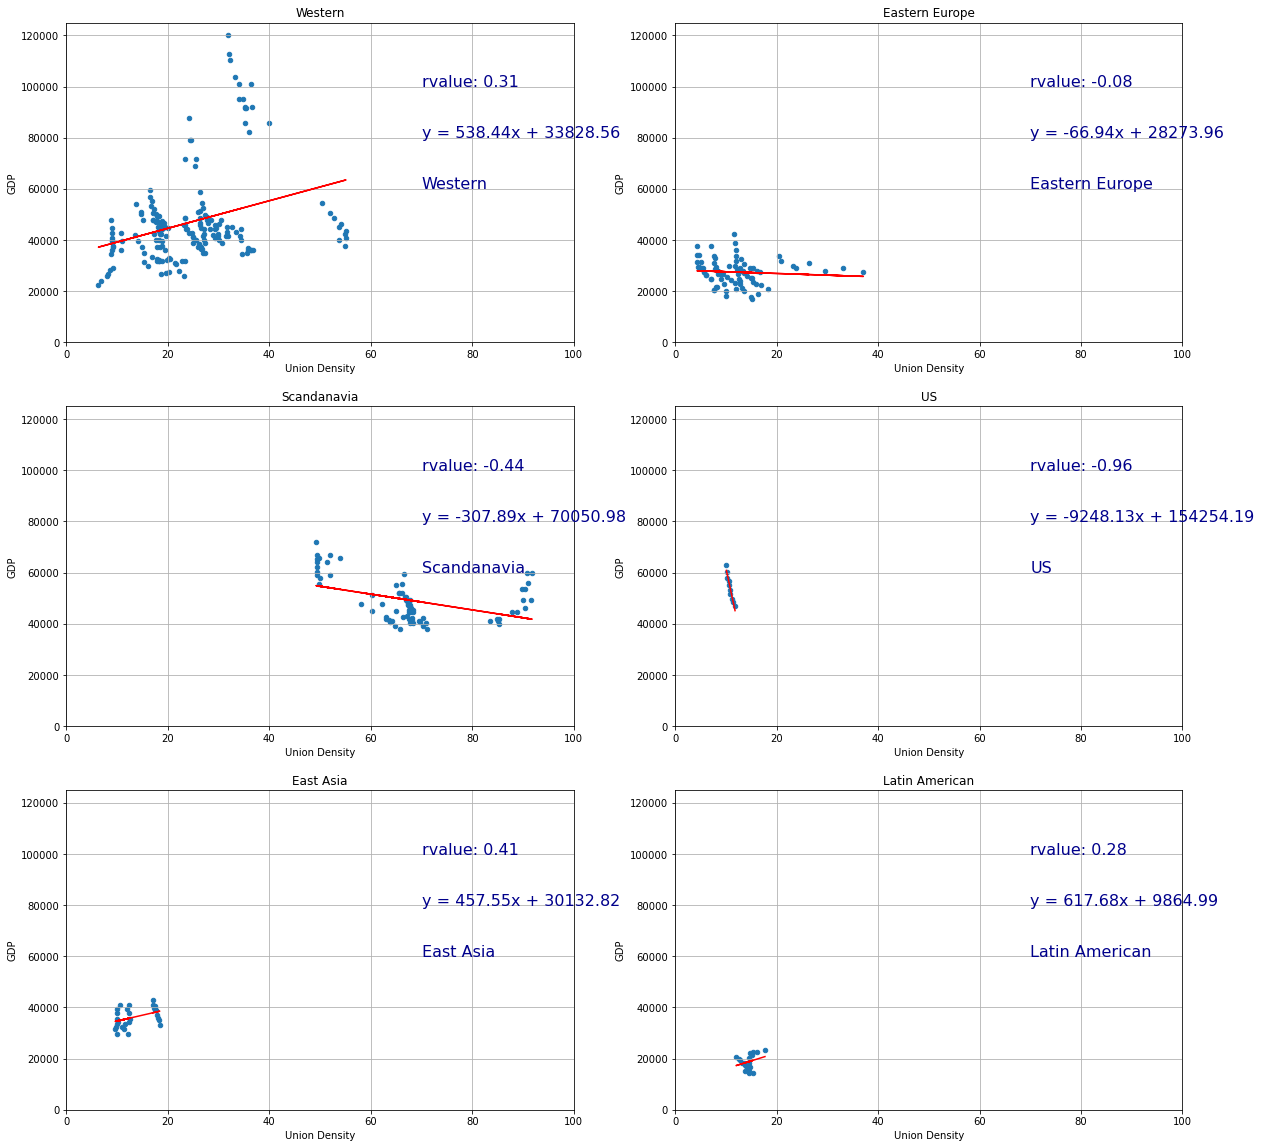

In [86]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

for region in df:
    x_position=df[region]["x"]
    y_position=df[region]["y"]
    df[region]["df"].plot.scatter(x="Union Density", y="GDP", ax=ax[x_position][y_position], grid=True)
    ax[x_position][y_position].set_title(region)
    ax[x_position][y_position].set_ylim(0, 125000)
    ax[x_position][y_position].set_xlim(0, 100)
    
    x = df[region]["df"]["Union Density"]
    y = df[region]["df"]["GDP"]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    ax[x_position][y_position].plot(x, regress_values, "r-")
    
    ax[x_position][y_position].annotate(region, (70,60000), fontsize=16, color="darkblue")
    ax[x_position][y_position].annotate(line_eq, (70,80000), fontsize=16, color="darkblue")
    ax[x_position][y_position].annotate(f"rvalue: {round(rvalue,2)}", (70,100000), fontsize=16, color="darkblue")

plt.savefig("output/oecd_regression_gdp_regional.png")

In [38]:
#Add "color" and "group" columns
GDP_working_df["Color"] = ""
GDP_working_df["Group"] = ""
GDP_working_df.head()

<ipython-input-38-5ead54b85c74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_working_df["Color"] = ""
<ipython-input-38-5ead54b85c74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_working_df["Group"] = ""


,Country,Year,Union Density,GDP,Color,Group
0,Hungary,2009,11.9,20689.04670,,
1,Hungary,2015,9.0,26777.47046,,
2,Hungary,2015,9.4,26777.47046,,
3,Poland,2009,16.3,19088.28902,,
4,Poland,2010,18.3,20828.98653,,


In [39]:
#iterate through df and assign values to new columns
for index, row in GDP_working_df.iterrows():
    if row["Country"] in west: 
        GDP_working_df.loc[index,"Group"] = "Western"
        GDP_working_df.loc[index,"Color"] = "b"
    if row["Country"] in east: 
        GDP_working_df.loc[index,"Group"] = "Eastern European" 
        GDP_working_df.loc[index,"Color"] = "g"
    if row["Country"] in scandinavian: 
        GDP_working_df.loc[index,"Group"] = "Scandinavia"
        GDP_working_df.loc[index,"Color"] = "r"
    if row["Country"] in us: 
        GDP_working_df.loc[index,"Group"] = "US" 
        GDP_working_df.loc[index,"Color"] = "p"
    if row["Country"] in asia: 
        GDP_working_df.loc[index,"Group"] = "East Asia" 
        GDP_working_df.loc[index,"Color"] = "y"
    if row["Country"] in latin: 
        GDP_working_df.loc[index,"Group"] = "Latin America"
        GDP_working_df.loc[index,"Color"] = "t"
GDP_working_df

C:\Users\berry\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Country,Year,Union Density,GDP,Color,Group
0,Hungary,2009,11.9,20689.04670,g,Eastern European
1,Hungary,2015,9.0,26777.47046,g,Eastern European
2,Hungary,2015,9.4,26777.47046,g,Eastern European
3,Poland,2009,16.3,19088.28902,g,Eastern European
4,Poland,2010,18.3,20828.98653,g,Eastern European
...,...,...,...,...,...,...
396,United States,2014,10.7,55008.01240,p,US
397,United States,2015,10.6,56831.65482,p,US
398,United States,2016,10.3,58000.88803,p,US
399,United States,2017,10.3,60091.56878,p,US


## Calculate statistical outliers

In [45]:
gdp=GDP_working_df["GDP"]
quartiles=gdp.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[.75]
gdpiqr=upperq - lowerq
gdplower_bound=lowerq-(1.5*gdpiqr)
gdpupper_bound=upperq+(1.5*gdpiqr)
print(f"The IQR is: {gdpiqr}")
gdp_outliers=GDP_working_df.loc[(GDP_working_df['GDP'] < gdplower_bound) | (GDP_working_df['GDP'] > gdpupper_bound)]
print("STATISTICAL OUTLIERS:")
gdp_outliers

The IQR is: 15697.521379999998
STATISTICAL OUTLIERS:


,Country,Year,Union Density,GDP,Color,Group
57,Norway,2018,49.2,71909.29958,r,Scandinavia
135,Ireland,2016,25.6,71793.28575,b,Western
136,Ireland,2016,23.4,71793.28575,b,Western
137,Ireland,2017,24.5,78990.82586,b,Western
138,Ireland,2017,24.3,78990.82586,b,Western
178,Luxembourg,2009,35.9,82249.99851,b,Western
179,Luxembourg,2010,35.1,85587.01465,b,Western
180,Luxembourg,2010,40.0,85587.01465,b,Western
181,Luxembourg,2011,35.1,91814.03661,b,Western
182,Luxembourg,2011,36.6,91814.03661,b,Western


In [46]:
#remove gdp_outliers from GDP_working_df
filtered_df = GDP_working_df.drop(gdp_outliers.index)
filtered_df

,Country,Year,Union Density,GDP,Color,Group
0,Hungary,2009,11.9,20689.04670,g,Eastern European
1,Hungary,2015,9.0,26777.47046,g,Eastern European
2,Hungary,2015,9.4,26777.47046,g,Eastern European
3,Poland,2009,16.3,19088.28902,g,Eastern European
4,Poland,2010,18.3,20828.98653,g,Eastern European
...,...,...,...,...,...,...
396,United States,2014,10.7,55008.01240,p,US
397,United States,2015,10.6,56831.65482,p,US
398,United States,2016,10.3,58000.88803,p,US
399,United States,2017,10.3,60091.56878,p,US


In [47]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

In [48]:
ud=GDP_working_df["Union Density"]
quartiles=ud.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[.75]
udiqr=upperq - lowerq
udlower_bound=lowerq-(1.5*udiqr)
udupper_bound=upperq+(1.5*udiqr)
print(f"The IQR is: {udiqr}")
ud_outliers=GDP_working_df.loc[(GDP_working_df['Union Density'] < udlower_bound) | (GDP_working_df['Union Density'] > udupper_bound)]
print("STATISTICAL OUTLIERS:")
ud_outliers

The IQR is: 22.3
STATISTICAL OUTLIERS:


,Country,Year,Union Density,GDP,Color,Group
13,Sweden,2009,70.8,40309.17759,r,Scandinavia
15,Sweden,2010,70.2,42256.28007,r,Scandinavia
58,Iceland,2011,83.4,40938.66455,r,Scandinavia
59,Iceland,2011,85.0,40938.66455,r,Scandinavia
60,Iceland,2013,87.8,44404.73159,r,Scandinavia
61,Iceland,2013,88.9,44404.73159,r,Scandinavia
62,Iceland,2015,90.0,49203.29499,r,Scandinavia
63,Iceland,2015,91.6,49203.29499,r,Scandinavia
64,Iceland,2016,89.8,53486.61577,r,Scandinavia
65,Iceland,2016,90.4,53486.61577,r,Scandinavia


In [67]:
filtered_df2 = filtered_df.drop(ud_outliers.index)

The Union Density IQR is: 22.3
The GDP IQR is: 15697.521379999998
Coefficient of Determination: 0.494559752975609


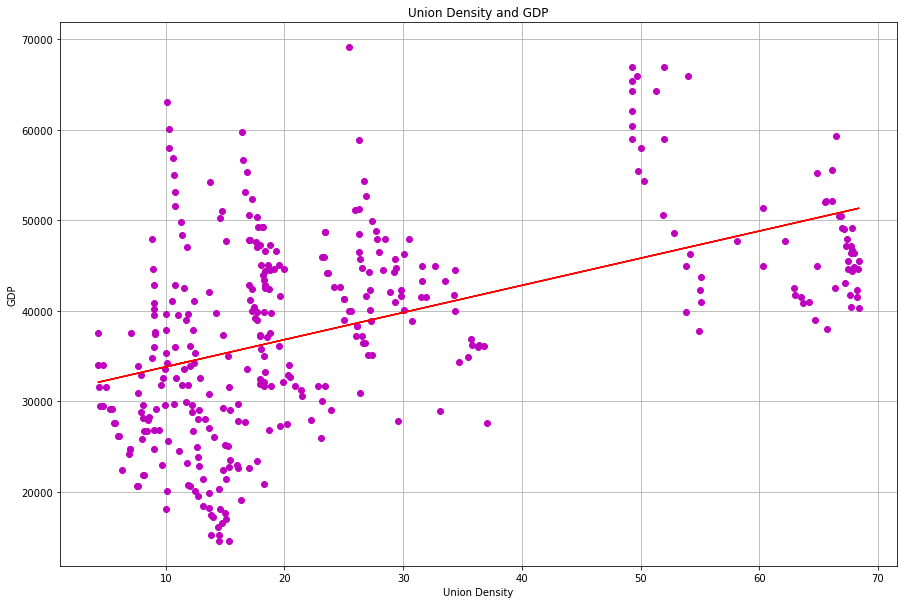

In [87]:
plt.figure(figsize=(15,10))
x=filtered_df2["Union Density"].values.reshape(-1,1)
y=filtered_df2["GDP"].values.reshape(-1,1)
slope, intercept, r_value, p_value, std_err = st.linregress(x[:,0], y[:,0])
plt.plot(x,y,"o",color="m")
plt.plot(x,intercept+slope*x,"r")
plt.grid(True)
plt.title("Union Density and GDP")
plt.xlabel("Union Density")
plt.ylabel("GDP")
print(f"The Union Density IQR is: {udiqr}")
print(f"The GDP IQR is: {gdpiqr}")
print(f'Coefficient of Determination: {r_value}')
plt.savefig("output/gdpwooutliers.png")

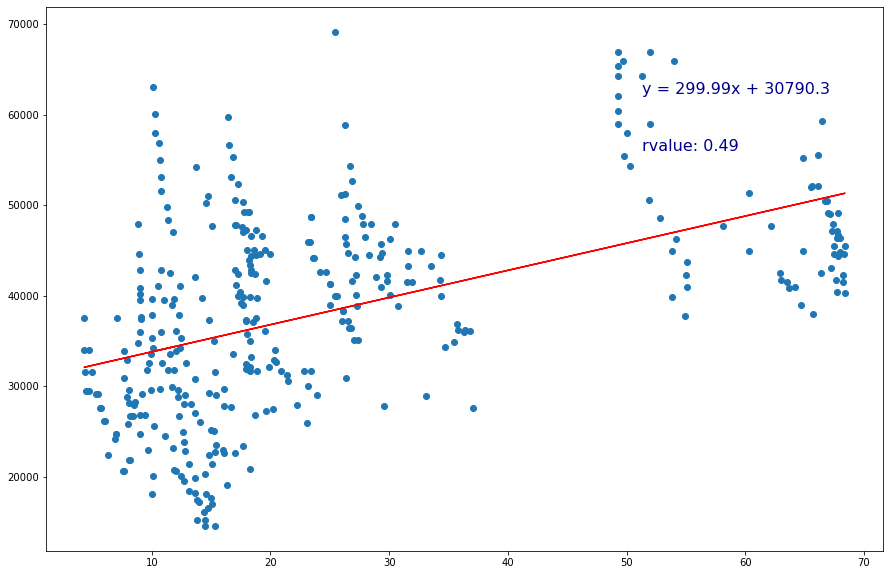

In [84]:
linear_regression(filtered_df2,x_column="Union Density",y_column="GDP",figsize=(15,10))

In [89]:
import seaborn as sns
import os

In [93]:
#import csv file from OECD
data_file_path = os.path.join("output", "data_working.csv")
data_file_df = pd.read_csv(data_file_path)
data_file_df.head()

,Unnamed: 0,Country,Year,Union %,Gini,CPI
0,0,Hungary,2009,11.9,0.245,95.369304
1,1,Hungary,2015,9.0,0.291,111.384411
2,2,Poland,2009,16.3,0.305,97.484226
3,3,Poland,2010,18.3,0.307,100.000000
4,4,Poland,2011,17.0,0.304,104.239401


In [95]:
#Create lists of countries based on their 2020 ITUC ratings
list5 = ["Greece","Korea","Turkey"]
list4 = ["Mexico","United States","Chile"]
list3 = ["Australia","Hungary","Poland","United Kingdom"]
list2 = ["Belgium","Canada","Czech Republic","Spain","Estonia","France","Israel","Japan","Latvia","Lithuania","New Zealand","Portugal","Switzerland"]
list1 = ["Austria","Denmark","Finland","Germany","Iceland","Ireland","Italy","Netherlands","Norway","Slovak Republic","Sweden"]

In [96]:
#Create a list of the countries
#OECD countries not included: Luxembourg and Slovenia
countries=["Greece","Korea","Turkey","Mexico","United States","Chile","Australia","Canada",
                 "Hungary","Poland","Spain","United Kingdom",
                "Belgium","Czech Republic","Estonia","France","Israel","Japan","Latvia","Lithuania","New Zealand",
                 "Portugal","Switzerland","Austria","Denmark","Finland","Germany","Iceland","Ireland","Italy",
                 "Netherlands","Norway","Slovak Republic","Sweden"]

In [97]:
#Create a data frame from the lists
dict={"Country":["Greece","South Korea","Turkey","Mexico","United States of America","Chile","Australia","Canada",
                 "Hungary","Poland","Spain","United Kingdom",
                "Belgium","Czech Republic","Estonia","France","Israel","Japan","Latvia","Lithuania","New Zealand",
                 "Portugal","Switzerland","Austria","Denmark","Finland","Germany","Iceland","Ireland","Italy",
                 "Netherlands","Norway","Slovakia","Sweden"]}

df=pd.DataFrame(dict)
df.head()

,Country
0,Greece
1,South Korea
2,Turkey
3,Mexico
4,United States of America


In [98]:
#Create a list of each countries rating
my_list=[]
for country in countries:
    if country in list5:
        my_list.append(5)
    if country in list4:
        my_list.append(4)
    if country in list3:
        my_list.append(3)
    if country in list2:
        my_list.append(2)
    if country in list1:
        my_list.append(1)

In [99]:
#Create a dictionary of the countries and their ratings
new_dict=zip(countries,my_list)
new_dict

In [100]:
#turn the dictionary into a dataframe
df1=pd.DataFrame(new_dict)
df1.head()

,0,1
0,Greece,5
1,Korea,5
2,Turkey,5
3,Mexico,4
4,United States,4


In [101]:
#change column headers
df1=df1.rename(columns={0:"Country",1:"Score"})
df1.head()

,Country,Score
0,Greece,5
1,Korea,5
2,Turkey,5
3,Mexico,4
4,United States,4


In [102]:
#format the data_file_df
data_df=data_file_df.drop(["Unnamed: 0"],axis=1)
data_df.head()

,Country,Year,Union %,Gini,CPI
0,Hungary,2009,11.9,0.245,95.369304
1,Hungary,2015,9.0,0.291,111.384411
2,Poland,2009,16.3,0.305,97.484226
3,Poland,2010,18.3,0.307,100.000000
4,Poland,2011,17.0,0.304,104.239401


In [103]:
#merge the ITUC ratings to the data from the OECD
result_df=data_df.merge(df1,how="left",on="Country")
result_df.head()

,Country,Year,Union %,Gini,CPI,Score
0,Hungary,2009,11.9,0.245,95.369304,3.0
1,Hungary,2015,9.0,0.291,111.384411,3.0
2,Poland,2009,16.3,0.305,97.484226,3.0
3,Poland,2010,18.3,0.307,100.000000,3.0
4,Poland,2011,17.0,0.304,104.239401,3.0


In [104]:
result_df.to_csv(os.path.join("output","ITUC.csv"))

In [105]:
#group the countries by their rating and determine the average Gini coefficient and union density for each score
gini_v_score=result_df.groupby("Score").mean()
gini_v_score

,Year,Union %,Gini,CPI
Score,,,,
1.0,2013.130000,44.382000,0.278650,105.844315
2.0,2013.244898,17.117347,0.312929,105.317112
3.0,2013.482759,17.410345,0.318931,108.275392
4.0,2012.764706,12.464706,0.425706,107.576624
5.0,2013.153846,12.030769,0.337692,111.650263


In [106]:
#reset the index and turn the groupby object into a data frame
gini_v_score_df=gini_v_score.reset_index()
gini_v_score_df

,Score,Year,Union %,Gini,CPI
0,1.0,2013.130000,44.382000,0.278650,105.844315
1,2.0,2013.244898,17.117347,0.312929,105.317112
2,3.0,2013.482759,17.410345,0.318931,108.275392
3,4.0,2012.764706,12.464706,0.425706,107.576624
4,5.0,2013.153846,12.030769,0.337692,111.650263


In [107]:
#remove year and CPI columns
df2=gini_v_score_df[["Gini","Union %","Score"]]
df2

,Gini,Union %,Score
0,0.278650,44.382000,1.0
1,0.312929,17.117347,2.0
2,0.318931,17.410345,3.0
3,0.425706,12.464706,4.0
4,0.337692,12.030769,5.0


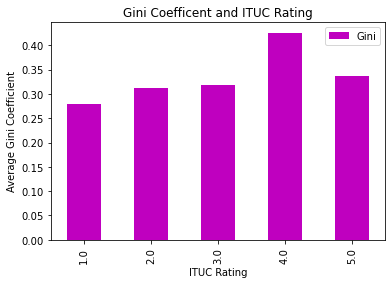

In [109]:
import matplotlib.colors as mcolors
#create bar plot for rating and Gini coefficient
df2.plot.bar("Score","Gini",color="m")
plt.title("Gini Coefficent and ITUC Rating")
plt.xlabel("ITUC Rating")
plt.ylabel("Average Gini Coefficient")
plt.savefig(os.path.join("output","gvr.png"))